In [1]:
import pandas as pd
import numpy as np

In [22]:
df = pd.read_excel('편의점.xlsx', header=0, index_col=0, squeeze=True)

In [23]:
weather = pd.read_excel('weather.xlsx')

In [24]:
la = pd.read_excel('랄라블라.xlsx')

In [25]:
df.head()

,평균기온,평균최고기온,최고기온,평균최저기온,최저기온,평균일강수량,최다일강수량,1시간최다강수량,평균풍속,최대풍속,...,마스크,맥주,면도기,생리대,생수,숙취해소제,스타킹,아이스크림,우산,탄산음료
일시,,,,,,,,,,,,,,,,,,,,,
2016-01-01,1.8,5.4,6.7,-3.3,-6.9,0.0,0.0,0.0,1.5,12.7,...,406,24247,504,3169,10648,5232,1100,28600,14.0,6293
2016-01-02,6.5,10.4,11.3,2.4,-1.5,0.0,0.0,0.0,2.1,9.3,...,238,22818,469,2947,10137,4695,1289,24111,35.0,5893
2016-01-03,5.8,9.0,10.7,3.5,-1.5,0.0,0.0,0.0,1.1,6.9,...,588,21353,546,2375,9083,3752,1309,24459,21.0,5787
2016-01-04,2.3,5.7,8.0,-2.4,-4.3,0.0,0.0,0.0,3.0,7.0,...,693,16254,413,3012,11947,2651,1416,15062,7.0,5654
2016-01-05,-2.2,1.2,3.1,-4.5,-6.7,0.0,0.0,0.0,2.4,6.0,...,399,17192,420,2960,9662,3850,1241,14326,NaN,5367


In [45]:
df.sort_values

<bound method DataFrame.sort_values of             평균기온  평균최고기온  최고기온  평균최저기온  최저기온  평균일강수량  최다일강수량  1시간최다강수량  평균풍속  \
일시                                                                             
2016-01-01   1.8     5.4   6.7    -3.3  -6.9     0.0     0.0       0.0   1.5   
2016-01-02   6.5    10.4  11.3     2.4  -1.5     0.0     0.0       0.0   2.1   
2016-01-03   5.8     9.0  10.7     3.5  -1.5     0.0     0.0       0.0   1.1   
2016-01-04   2.3     5.7   8.0    -2.4  -4.3     0.0     0.0       0.0   3.0   
2016-01-05  -2.2     1.2   3.1    -4.5  -6.7     0.0     0.0       0.0   2.4   
2016-01-06  -1.1     2.5   4.4    -4.5  -9.2     0.0     0.0       0.0   1.8   
2016-01-07  -2.7     1.6   3.3    -5.8 -10.4     0.0     0.0       0.0   2.4   
2016-01-08  -2.6     1.9   3.3    -7.1 -11.8     0.0     0.0       0.0   1.8   
2016-01-09  -1.3     2.8   4.0    -5.5 -11.6     0.0     0.0       0.0   1.9   
2016-01-10   0.8     4.5   6.7    -2.9  -6.2     0.0     0.0       0.0   2.4   
2

In [41]:
df.fillna(0, inplace=True)

In [42]:
df['우산'].isnull().sum()

0

In [31]:
df1 = pd.DataFrame({df.index,df['탄산음료']}, columns=['날짜', '탄산음료'])
df1

TypeError: unhashable type: 'DatetimeIndex'

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="C:\Windows\Fonts\malgun.ttf").get_name()
rc('font', family=font_name)

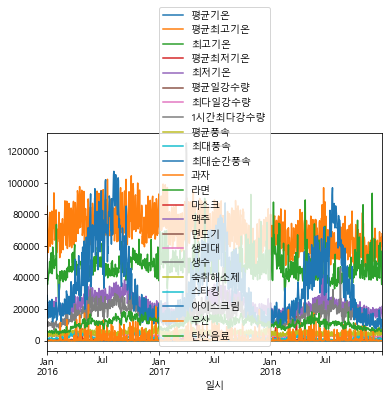

In [11]:
df.plot()

In [47]:
from matplotlib.image import NonUniformImage

In [49]:
from scipy import stats

ValueError: x must be 1d. Got 2 dims.

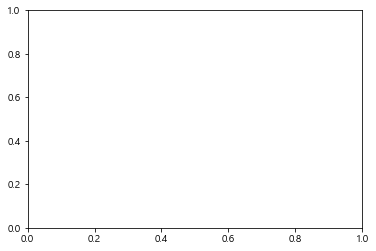

In [50]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df)
plot_pacf(df)
plt.show()

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

diff_1=df.diff(periods=1).iloc[1:]
diff_1.plot()
plot_acf(diff_1)
plot_pacf(diff_1)
plt.show()

TypeError: numpy boolean subtract, the `-` operator, is deprecated, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

In [58]:
diff_1=df.diff(periods=1).iloc[1:]

TypeError: numpy boolean subtract, the `-` operator, is deprecated, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

In [60]:
model = ARIMA(df,order=(24,0,0),exog=True,dates=df.index,freq='M')

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [53]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(df, order=(24,0,0))
model_fit = model.fit(trend='c',full_output=True, disp=1)
print(model_fit.summary())

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [16]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(df, order=(0,1,1))
model_fit = model.fit(trend='nc',full_output=True, disp=1)
print(model_fit.summary())

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [ ]:
model_fit.plot_predict()

In [ ]:
fore = model_fit.forecast(steps=1)
print(fore)